The link to view the Google Colab Notebook is here: https://colab.research.google.com/drive/191R8wQ-OI0Ku37_oGMEPYrttxWCr__Oi?usp=sharing

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
df = pd.read_csv("historical_data.csv")
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [201]:
df1 = pd.read_csv("fear_greed_index.csv")
df1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [202]:
from sklearn.preprocessing import OneHotEncoder

In [203]:
df1 = df1.drop(['timestamp','value'], axis=1)
df1.head()

,classification,date
0,Fear,2018-02-01
1,Extreme Fear,2018-02-02
2,Fear,2018-02-03
3,Extreme Fear,2018-02-04
4,Extreme Fear,2018-02-05


In [204]:
dummies1 = pd.get_dummies(df1['classification'], dtype = int)
dummies1.head()

,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [205]:
df1.drop(['classification'], axis=1, inplace=True)
merged1 = pd.concat([df1, dummies1], axis=1)
merged1.head()

,date,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
0,2018-02-01,0,0,1,0,0
1,2018-02-02,1,0,0,0,0
2,2018-02-03,0,0,1,0,0
3,2018-02-04,1,0,0,0,0
4,2018-02-05,1,0,0,0,0


In [206]:
df['Timestamp IST'] = pd.to_datetime(df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce') # Using errors='coerce' here as well for safety

df['date'] = df['Timestamp IST'].dt.date

display(df.head())
display(df.info())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,2024-12-02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

None

In [207]:
merged1['date'] = pd.to_datetime(merged1['date']).dt.date

merged_df = pd.merge(df, merged1, on='date', how='left')

display(merged_df.head())
display(merged_df.info())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,date,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,True,0.345404,8.950000e+14,1970-01-01 00:28:50,2024-12-02,0.0,1.0,0.0,0.0,0.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,True,0.005600,4.430000e+14,1970-01-01 00:28:50,2024-12-02,0.0,1.0,0.0,0.0,0.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,True,0.050431,6.600000e+14,1970-01-01 00:28:50,2024-12-02,0.0,1.0,0.0,0.0,0.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,True,0.050043,1.080000e+15,1970-01-01 00:28:50,2024-12-02,0.0,1.0,0.0,0.0,0.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,True,0.003055,1.050000e+15,1970-01-01 00:28:50,2024-12-02,0.0,1.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

None

In [208]:
sentiment_behavior = merged_df.groupby(['date', 'Side'])[['Size USD']].mean().reset_index()

sentiment_behavior_pivot = sentiment_behavior.pivot(index='date', columns='Side', values='Size USD').reset_index()


sentiment_behavior_merged = pd.merge(sentiment_behavior_pivot, merged1, on='date', how='left')

average_size_by_sentiment = sentiment_behavior_merged.groupby(['Extreme Fear','Extreme Greed', 'Fear', 'Greed', 'Neutral'])[['BUY', 'SELL']].mean().reset_index()

display(average_size_by_sentiment)

,Extreme Fear,Extreme Greed,Fear,Greed,Neutral,BUY,SELL
0,0.0,0.0,0.0,0.0,1.0,6107.816173,7286.183687
1,0.0,0.0,0.0,1.0,0.0,6780.832709,6977.083427
2,0.0,0.0,1.0,0.0,0.0,7359.438697,6061.868623
3,0.0,1.0,0.0,0.0,0.0,5877.036772,5146.781978
4,1.0,0.0,0.0,0.0,0.0,4639.762824,3991.411121


In [209]:
sentiment_performance = merged_df.groupby(['Extreme Fear','Extreme Greed', 'Fear', 'Greed', 'Neutral'])[['Closed PnL']].mean().reset_index()

display(sentiment_performance)

,Extreme Fear,Extreme Greed,Fear,Greed,Neutral,Closed PnL
0,0.0,0.0,0.0,0.0,1.0,34.307718
1,0.0,0.0,0.0,1.0,0.0,42.743559
2,0.0,0.0,1.0,0.0,0.0,54.290400
3,0.0,1.0,0.0,0.0,0.0,67.892861
4,1.0,0.0,0.0,0.0,0.0,34.537862


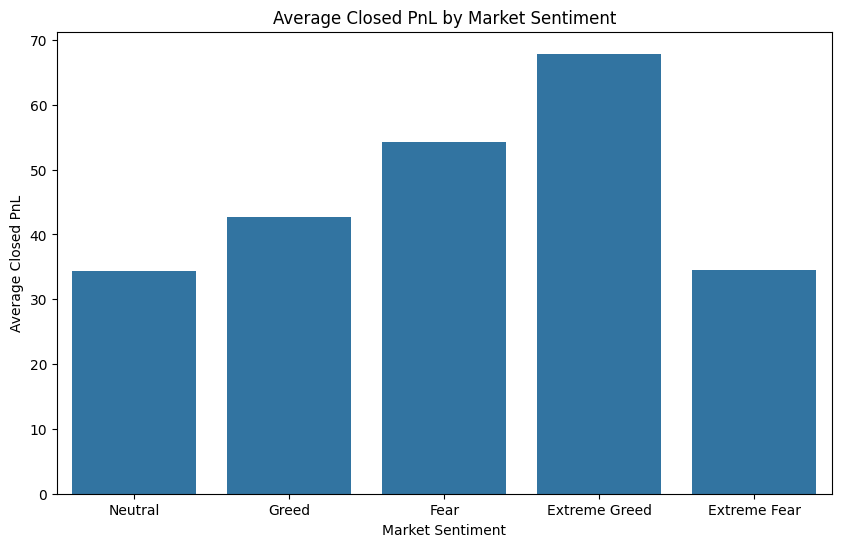

In [212]:
sentiment_performance['Sentiment'] = sentiment_performance[['Extreme Fear','Extreme Greed', 'Fear', 'Greed', 'Neutral']].apply(
    lambda x: 'Extreme Fear' if x['Extreme Fear'] == 1 else(
    'Extreme Greed' if x['Extreme Greed'] == 1 else (
        'Fear' if x['Fear'] == 1 else (
            'Greed' if x['Greed'] == 1 else (
                'Neutral' if x['Neutral'] == 1 else 'Unknown'
            )
        )
    )
), axis=1)

plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='Closed PnL', data=sentiment_performance)
plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.show()

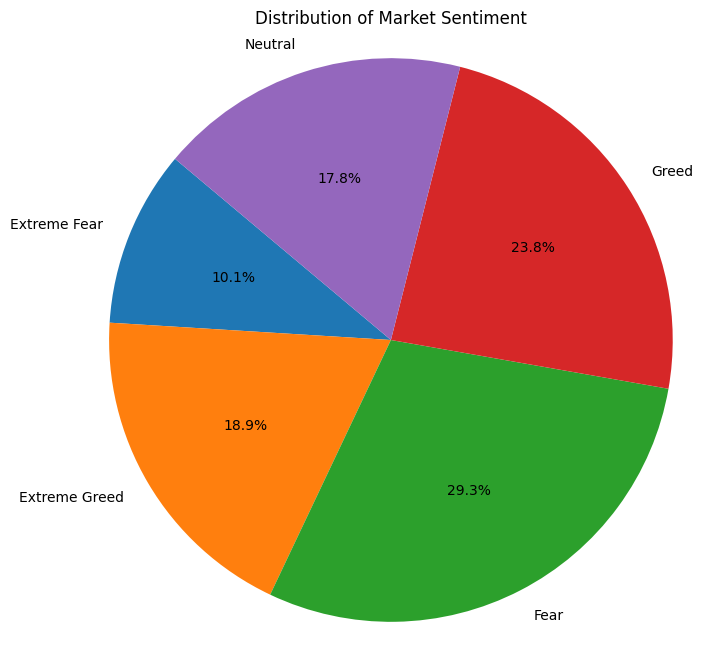

In [211]:
sentiment_counts = merged_df[['Extreme Fear','Extreme Greed', 'Fear', 'Greed', 'Neutral']].sum()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Market Sentiment')
plt.axis('equal')
plt.show()